In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# Note that cases and deaths are CUMULATIVE. The only way it goes down (in the case of Sherburne, for example)
#  is if a patient is moved to a different county for treatment
# Date through 4/12

df = pd.read_csv('us-counties.csv')
df_pop = pd.read_csv('population.csv')

# For analysis when we only want the most up-to-date cumulative data:
date_for_analysis = '2020-04-13'

In [125]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [126]:
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


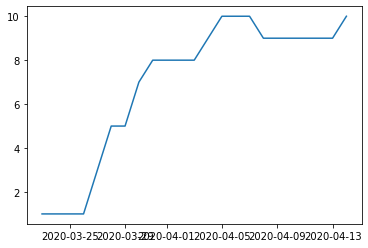

In [127]:
# Make a line chart for Sherburne county
sherburne = df[df['county']=='Sherburne']
plt.plot(sherburne['date'], sherburne['cases'])

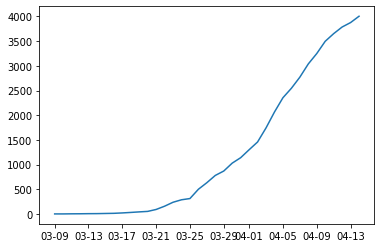

In [128]:
# Monmouth, NJ is where Jordan is
monmouth = df[df['county']=='Monmouth']
#plt.xticks(rotation=90)
myFmt = mdates.DateFormatter('%m-%d')

fig, ax = plt.subplots()
ax.plot(monmouth['date'], monmouth['cases'])

ax.xaxis_date()
ax.xaxis.set_major_formatter(myFmt)

#plt.plot(monmouth['date'], monmouth['cases'])
#plt.show()

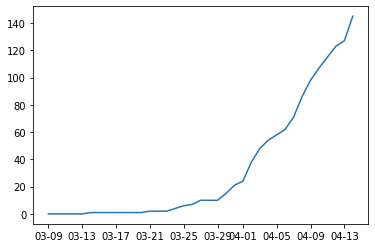

In [129]:
# Deaths in Monmouth
myFmt = mdates.DateFormatter('%m-%d')

fig, ax = plt.subplots()
ax.plot(monmouth['date'], monmouth['deaths'])


ax.xaxis_date()
ax.xaxis.set_major_formatter(myFmt)

In [130]:
# How many counties have (had) cases but no deaths?
# Answer: A LOT. Of counties with at least one case, 75% have seen no deaths.
no_deaths = df[(df['cases'] > 0) & (df['deaths'] == 0)]
#print(len(no_deaths))
print("Ratio of counties with at least one case but no deaths:")
print(len(no_deaths) / len(df))

Ratio of counties with at least one case but no deaths:
0.7355735961788384


In [131]:
# Which county has the worst death rate? (perhaps above a certain threshold of cases, say, 100?)

df['death_rate'] = df['deaths'] / df['cases']
rate_sun = df[df['date']==date_for_analysis][['county','state', 'cases','deaths','death_rate']]

In [132]:
# Answer if cutting off at 100 cases:
rate_sun[rate_sun['cases']>100].sort_values(['death_rate'], ascending=False).head(5)

,county,state,cases,deaths,death_rate
54941,Franklin,Massachusetts,148,25,0.168919
55649,Miami,Ohio,121,15,0.123967
55661,Portage,Ohio,144,17,0.118056
54879,St. Landry,Louisiana,114,13,0.114035
56298,Henrico,Virginia,397,45,0.113350


In [133]:
# If cases need to be above 1,000:
rate_sun[rate_sun['cases'] > 1000].sort_values(['death_rate'], ascending=False).head(5)

,county,state,cases,deaths,death_rate
54994,Macomb,Michigan,3418,240,0.070217
54942,Hampden,Massachusetts,1694,116,0.068477
55007,Oakland,Michigan,5073,347,0.068401
55442,New York City,New York,106764,7154,0.067008
56385,King,Washington,4551,298,0.065480


In [134]:
# Question: Which states are doing the best on a per-capita basis (for both deaths and cases)

In [135]:
# Group by state
state_group = rate_sun[['state', 'cases', 'deaths']].groupby('state').sum()

In [136]:
merged = state_group.merge(df_pop[['NAME','POPESTIMATE2019']], left_on='state', right_on='NAME')

In [137]:
merged['cases_per_million'] = (merged['cases'] / merged['POPESTIMATE2019']) * 1000000

In [138]:
merged['deaths_per_million'] = (merged['deaths'] / merged['POPESTIMATE2019']) * 1000000

In [139]:
# Ordered by best case-rates
case_rates = merged.sort_values('cases_per_million', ascending=True).reset_index()
case_rates.head(15)

,index,cases,deaths,NAME,POPESTIMATE2019,cases_per_million,deaths_per_million
0,39,897,45,Puerto Rico,3193694,280.865982,14.090267
1,23,1650,70,Minnesota,5639632,292.572281,12.412157
2,11,502,9,Hawaii,1415872,354.551824,6.356507
3,49,638,9,West Virginia,1792147,355.997583,5.021909
4,26,394,7,Montana,1068778,368.645313,6.549536
5,37,1584,53,Oregon,4217737,375.556845,12.565980
6,1,275,6,Alaska,731545,375.916724,8.201819
7,34,331,9,North Dakota,762062,434.347861,11.810063
8,27,871,19,Nebraska,1934408,450.266955,9.822126
9,17,2048,106,Kentucky,4467673,458.404185,23.725998


In [140]:
# Ordered by death-rates
death_rates = merged.sort_values('deaths_per_million').reset_index()
death_rates.head(15)

,index,cases,deaths,NAME,POPESTIMATE2019,cases_per_million,deaths_per_million
0,51,275,1,Wyoming,578759,475.154598,1.727835
1,49,638,9,West Virginia,1792147,355.997583,5.021909
2,45,2399,18,Utah,3205958,748.294270,5.614546
3,11,502,9,Hawaii,1415872,354.551824,6.356507
4,26,394,7,Montana,1068778,368.645313,6.549536
5,42,868,6,South Dakota,884659,981.169015,6.782274
6,1,275,6,Alaska,731545,375.916724,8.201819
7,33,4815,91,North Carolina,10488084,459.092433,8.676513
8,27,871,19,Nebraska,1934408,450.266955,9.822126
9,3,1475,30,Arkansas,3017804,488.766003,9.941003


In [141]:
# Which state has lowest combined-rank?

death_rates['d_index'] = death_rates.index

case_rates['c_index'] = case_rates.index

In [142]:
case_rates.head()

,index,cases,deaths,NAME,POPESTIMATE2019,cases_per_million,deaths_per_million,c_index
0,39,897,45,Puerto Rico,3193694,280.865982,14.090267,0
1,23,1650,70,Minnesota,5639632,292.572281,12.412157,1
2,11,502,9,Hawaii,1415872,354.551824,6.356507,2
3,49,638,9,West Virginia,1792147,355.997583,5.021909,3
4,26,394,7,Montana,1068778,368.645313,6.549536,4


In [143]:
# Answer: The ten best states on combined per-capita case/death ranking data:
combined_rates = death_rates.merge(case_rates, left_on='NAME', right_on='NAME')
combined_rates['combined_ranks'] = combined_rates['c_index'] + combined_rates['d_index']
combined_rates = combined_rates[['NAME', 'combined_ranks']]
combined_rates.sort_values('combined_ranks', ascending=True).head(10)

,NAME,combined_ranks
1,West Virginia,4
3,Hawaii,5
4,Montana,8
0,Wyoming,11
6,Alaska,12
12,Minnesota,13
15,Puerto Rico,15
8,Nebraska,16
7,North Carolina,17
11,North Dakota,18


In [144]:
# According to this dataset, there are no cases in Lawrence County
rate_sun[(rate_sun['state']=='Missouri') & ((rate_sun['county']=='Greene') | (rate_sun['county'] == 'Lawrence'))]

,county,state,cases,deaths,death_rate
55211,Greene,Missouri,71,8,0.112676


In [145]:
# List of question ideas:
# Question: Graph new-cases curves for a handful of states
    # Do same for counties (ie which counties saw the biggest spikes in cases recenty and ever)

In [146]:
merged.head()

,cases,deaths,NAME,POPESTIMATE2019,cases_per_million,deaths_per_million
0,3805,104,Alabama,4903185,776.026195,21.210703
1,275,6,Alaska,731545,375.916724,8.201819
2,3702,122,Arizona,7278717,508.606118,16.761196
3,1475,30,Arkansas,3017804,488.766003,9.941003
4,24334,725,California,39512223,615.860059,18.348752


In [147]:
#merged = state_group.merge(df_pop[['NAME','POPESTIMATE2019']], left_on='state', right_on='NAME')

counties = df.merge(df_pop[['NAME', 'POPESTIMATE2019']], left_on='state', right_on='NAME')

counties = counties.merge(counties, on='fips')
counties = counties[pd.DatetimeIndex(counties['date_x']) == pd.DatetimeIndex(counties['date_y']) + pd.DateOffset(1)]
counties.head()

,date_x,county_x,state_x,fips,cases_x,deaths_x,death_rate_x,NAME_x,POPESTIMATE2019_x,date_y,county_y,state_y,cases_y,deaths_y,death_rate_y,NAME_y,POPESTIMATE2019_y
85,2020-01-22,Snohomish,Washington,53061.0,1,0,0.0,Washington,7614893,2020-01-21,Snohomish,Washington,1,0,0.0,Washington,7614893
171,2020-01-23,Snohomish,Washington,53061.0,1,0,0.0,Washington,7614893,2020-01-22,Snohomish,Washington,1,0,0.0,Washington,7614893
257,2020-01-24,Snohomish,Washington,53061.0,1,0,0.0,Washington,7614893,2020-01-23,Snohomish,Washington,1,0,0.0,Washington,7614893
343,2020-01-25,Snohomish,Washington,53061.0,1,0,0.0,Washington,7614893,2020-01-24,Snohomish,Washington,1,0,0.0,Washington,7614893
429,2020-01-26,Snohomish,Washington,53061.0,1,0,0.0,Washington,7614893,2020-01-25,Snohomish,Washington,1,0,0.0,Washington,7614893


In [148]:
# Calculate new cases. Note that I'm losing the very first day for each county....
counties['new_cases'] = counties.cases_x - counties['cases_y']
counties['new_deaths'] = counties.deaths_x - counties['deaths_y']


In [149]:
# counties[(counties.state_x=='Minnesota') & (counties.date_x == '2020-04-13')].groupby('state_x').sum()

In [150]:
# Fix the issue where I'm dropping the first day for each county...

# First just get the min date_y for each fips
fips_min_date = counties.groupby(['fips'])[['date_y']].min().reset_index()
#fips_min_date[fips_min_date['fips'] == 53061.0]
fips_min_date[fips_min_date.fips == 53061.0]
#fips_min_date.head()
# Create a new dataframe with each county, state, fips, MIN(case_y),


,fips,date_y
2533,53061.0,2020-01-21


In [151]:
fips_min_date = fips_min_date.merge(counties, on='fips')
fips_min_date = fips_min_date[fips_min_date['date_y_y'] == fips_min_date['date_y_x']]

In [152]:
fips_min_date.head()

,fips,date_y_x,date_x,county_x,state_x,cases_x,deaths_x,death_rate_x,NAME_x,POPESTIMATE2019_x,date_y_y,county_y,state_y,cases_y,deaths_y,death_rate_y,NAME_y,POPESTIMATE2019_y,new_cases,new_deaths
0,1001.0,2020-03-24,2020-03-25,Autauga,Alabama,4,0,0.0,Alabama,4903185,2020-03-24,Autauga,Alabama,1,0,0.0,Alabama,4903185,3,0
21,1003.0,2020-03-14,2020-03-15,Baldwin,Alabama,1,0,0.0,Alabama,4903185,2020-03-14,Baldwin,Alabama,1,0,0.0,Alabama,4903185,0,0
52,1005.0,2020-04-03,2020-04-04,Barbour,Alabama,2,0,0.0,Alabama,4903185,2020-04-03,Barbour,Alabama,1,0,0.0,Alabama,4903185,1,0
63,1007.0,2020-03-30,2020-03-31,Bibb,Alabama,3,0,0.0,Alabama,4903185,2020-03-30,Bibb,Alabama,2,0,0.0,Alabama,4903185,1,0
78,1009.0,2020-03-25,2020-03-26,Blount,Alabama,3,0,0.0,Alabama,4903185,2020-03-25,Blount,Alabama,1,0,0.0,Alabama,4903185,2,0


In [153]:
fips_min_date[fips_min_date['county_x'] == 'Snohomish']

,fips,date_y_x,date_x,county_x,state_x,cases_x,deaths_x,death_rate_x,NAME_x,POPESTIMATE2019_x,date_y_y,county_y,state_y,cases_y,deaths_y,death_rate_y,NAME_y,POPESTIMATE2019_y,new_cases,new_deaths
52979,53061.0,2020-01-21,2020-01-22,Snohomish,Washington,1,0,0.0,Washington,7614893,2020-01-21,Snohomish,Washington,1,0,0.0,Washington,7614893,0,0


In [154]:
# Next steps: Now that I've got each county's first day with a case, clean this up and then UNION it to the first table I made
# And then ffs review this stuff so I don't have to dig around so much again next time
date_clean = fips_min_date[['fips', 'date_y_x', 'county_x', 'state_x', 'cases_y','deaths_y', 'POPESTIMATE2019_x']]


In [155]:
date_clean['new_cases'] = fips_min_date['cases_y']
date_clean['new_deaths'] = fips_min_date['deaths_y']
#date_clean.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [156]:
col_names = ['fips', 'date', 'county', 'state', 'cases', 'deaths', 'state_pop', 'new_cases', 'new_deaths']
date_clean.columns = col_names

In [157]:
# Aside: in less than 1% of counties, the first death and first case were reported on the same day
len(date_clean[date_clean['new_deaths'] > 0]) / len(date_clean)

0.009723261032161555

In [158]:
# Clean up counties df in similar way
counties_clean = counties.rename(columns={'date_x': 'date', 'county_x': 'county', 'state_x': 'state', 'cases_x':'cases', 'deaths_x':'deaths', 'POPESTIMATE2019_x':'state_pop'})

In [159]:
counties_clean = counties_clean[['fips', 'date', 'county', 'state', 'cases', 'deaths', 'state_pop', 'new_cases', 'new_deaths']]

In [160]:
counties_clean.head()

,fips,date,county,state,cases,deaths,state_pop,new_cases,new_deaths
85,53061.0,2020-01-22,Snohomish,Washington,1,0,7614893,0,0
171,53061.0,2020-01-23,Snohomish,Washington,1,0,7614893,0,0
257,53061.0,2020-01-24,Snohomish,Washington,1,0,7614893,0,0
343,53061.0,2020-01-25,Snohomish,Washington,1,0,7614893,0,0
429,53061.0,2020-01-26,Snohomish,Washington,1,0,7614893,0,0


In [161]:
date_clean[date_clean['county']=='Snohomish']

,fips,date,county,state,cases,deaths,state_pop,new_cases,new_deaths
52979,53061.0,2020-01-21,Snohomish,Washington,1,0,7614893,1,0


In [162]:
fulldf = pd.concat([date_clean, counties_clean])

In [163]:
date_clean = date_clean.rename(columns={'date':'first_case_date'})

In [164]:
fulldf = fulldf.merge(date_clean[['fips', 'first_case_date']], on='fips')
fulldf.head()

,fips,date,county,state,cases,deaths,state_pop,new_cases,new_deaths,first_case_date
0,1001.0,2020-03-24,Autauga,Alabama,1,0,4903185,1,0,2020-03-24
1,1001.0,2020-03-25,Autauga,Alabama,4,0,4903185,3,0,2020-03-24
2,1001.0,2020-03-26,Autauga,Alabama,6,0,4903185,2,0,2020-03-24
3,1001.0,2020-03-27,Autauga,Alabama,6,0,4903185,0,0,2020-03-24
4,1001.0,2020-03-28,Autauga,Alabama,6,0,4903185,0,0,2020-03-24


In [165]:
fulldf['days_since_first_case'] = (fulldf['date'] - fulldf['first_case_date']).dt.days

In [166]:
#fulldf.reset_index()
fulldf = fulldf.drop(columns=['first_case_date'])
fulldf.head()

,fips,date,county,state,cases,deaths,state_pop,new_cases,new_deaths,days_since_first_case
0,1001.0,2020-03-24,Autauga,Alabama,1,0,4903185,1,0,0
1,1001.0,2020-03-25,Autauga,Alabama,4,0,4903185,3,0,1
2,1001.0,2020-03-26,Autauga,Alabama,6,0,4903185,2,0,2
3,1001.0,2020-03-27,Autauga,Alabama,6,0,4903185,0,0,3
4,1001.0,2020-03-28,Autauga,Alabama,6,0,4903185,0,0,4


In [167]:
# At long last, I have the data in a form I want it to be in!

In [168]:
# Get a list of all counties that have a same-named county in another state
g = fulldf.groupby('county')
g2 = g.filter(lambda x: x['fips'].nunique() > 1)
dupe_counties = g2['county'].unique()

In [169]:
# Change only this line to get a curve for a different county:
def county_curve(county_name, state_name):
#     county_name = 'Suffolk'
#     state_name = 'Massachusetts'

    # if county_name in dupe_counties:
    #     print("Warning: There exists more than one county with that name in America.\
    #              \n Please ensure correct state is input as well.")

    county = fulldf[(fulldf['county']==county_name) & (fulldf['state']==state_name)]
    fig = plt.figure()

    ax1 = fig.add_subplot(211)
    ax1.set_ylabel('new cases')
    ax1.set_xlabel('days since first case')
    ax1.set_title('new cases curve: ' + county_name + ' County, '+state_name)

    line, = ax1.plot(county.days_since_first_case, county.new_cases, lw=2)

    plt.show()

In [170]:
# Now do state-level curves
# Then also look at largest jumps around the country (both ever and today specifically)


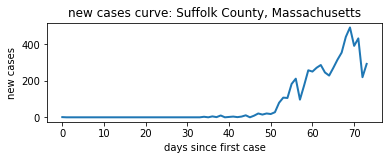

In [171]:
county_curve('Suffolk', 'Massachusetts')

In [172]:
# Change only this line to get a curve for a different county:
#def state_curve(state_name):
#     county_name = 'Suffolk'
#     state_name = 'Massachusetts'

    # if county_name in dupe_counties:
    #     print("Warning: There exists more than one county with that name in America.\
    #              \n Please ensure correct state is input as well.")
def state_curve(state_name):
    state = fulldf[fulldf['state']==state_name]
    state = state.groupby(['date']).sum()
    state = state.reset_index()

    # Get date of first case in that state (note that it's a dt object)
    first_case_date = state['date'].iloc[0]
    # Reset days_since_first_case
    state['days_since_first_case'] = (state['date'] - first_case_date).dt.days

    fig = plt.figure()

    ax1 = fig.add_subplot(211)
    ax1.set_ylabel('new cases')
    ax1.set_xlabel('days since first case')
    ax1.set_title('new cases curve for state of ' + state_name)

    line, = ax1.plot(state.days_since_first_case, state.new_cases, lw=2)

    plt.show()

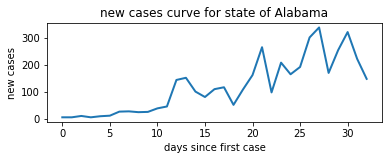

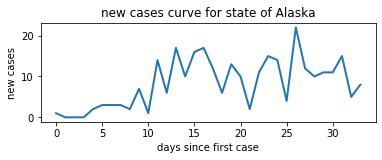

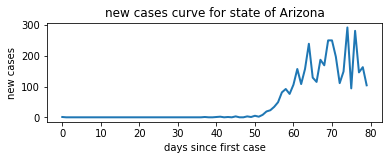

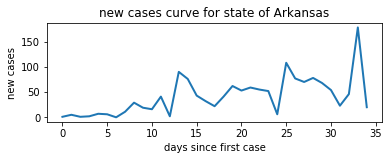

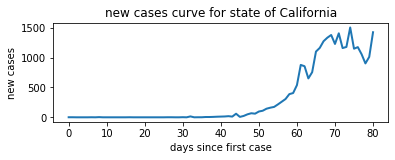

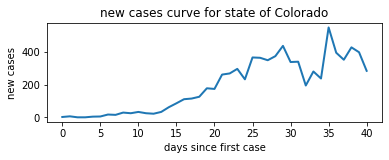

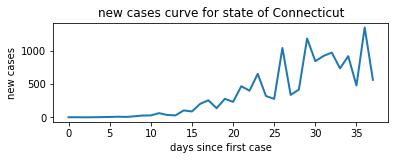

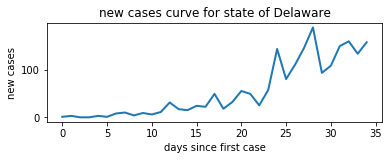

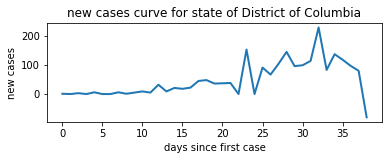

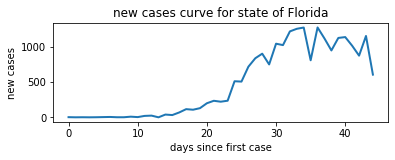

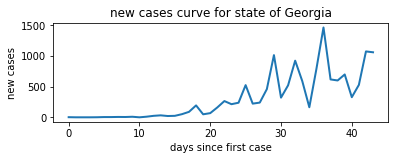

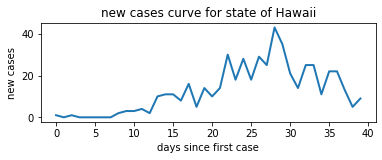

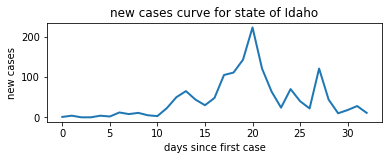

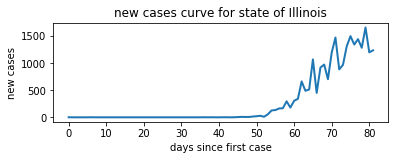

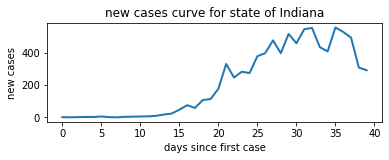

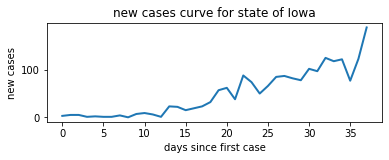

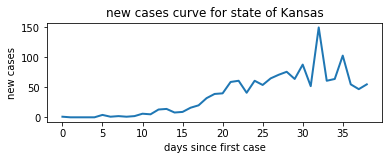

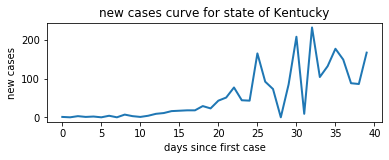

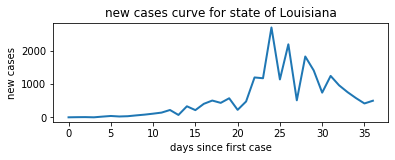

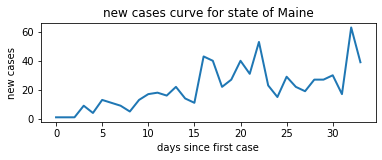

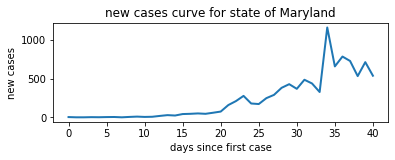

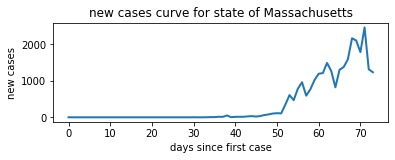

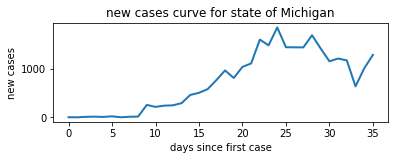

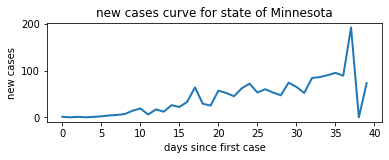

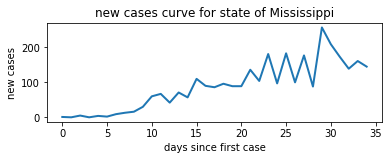

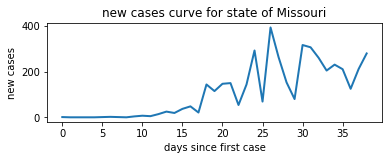

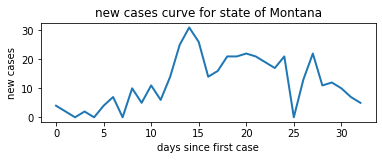

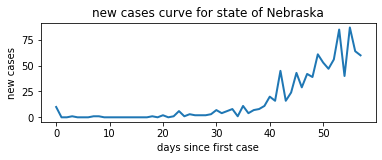

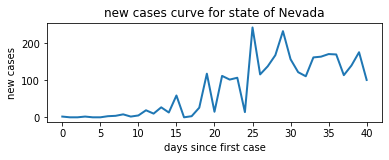

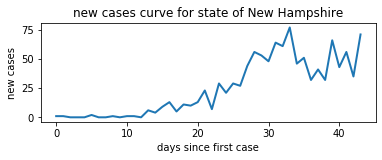

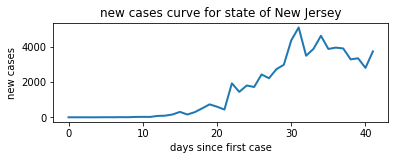

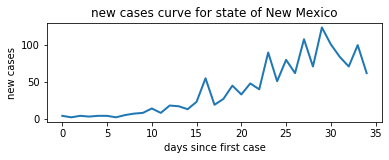

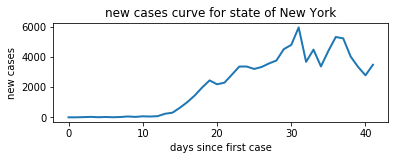

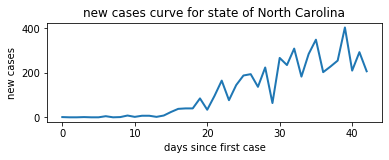

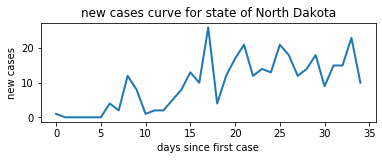

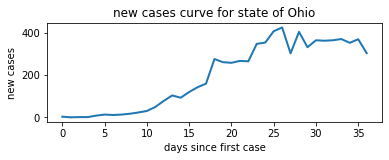

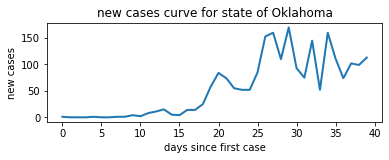

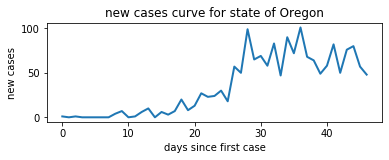

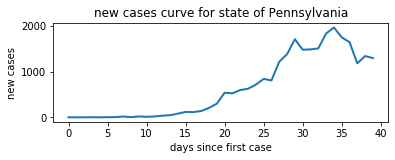

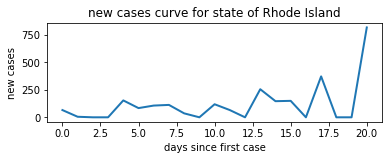

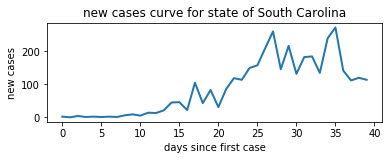

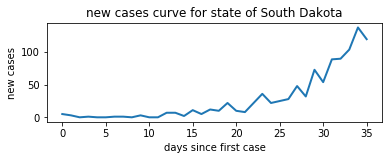

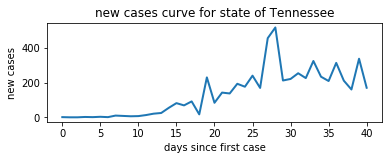

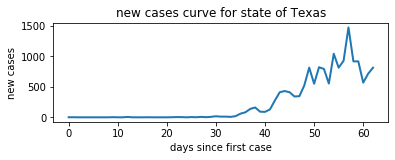

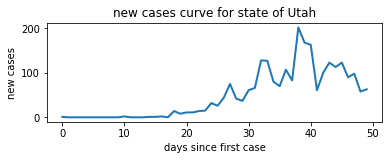

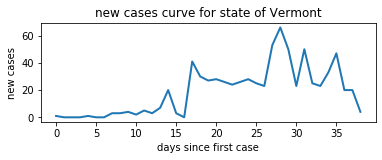

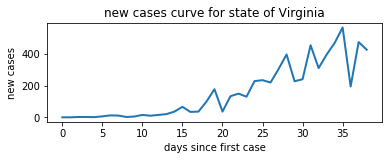

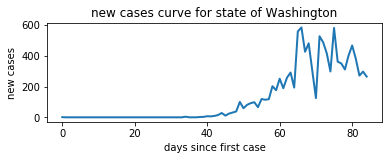

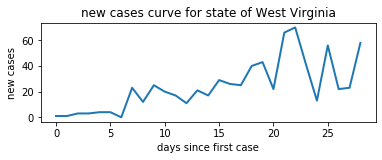

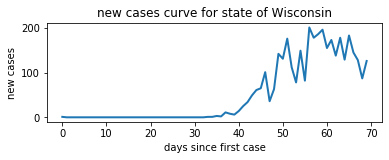

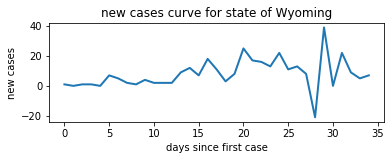

In [173]:
# Map out all fifty states's new-cases graph
states = fulldf['state'].unique()

for state in states:
    state_curve(state)

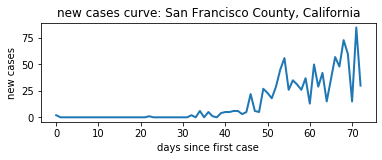

In [174]:
county_curve('San Francisco', 'California')

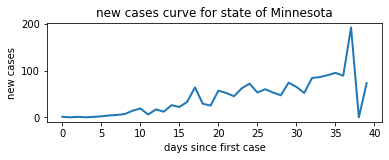

In [175]:
state_curve('Minnesota')

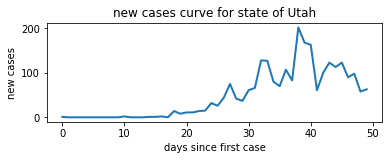

In [176]:
state_name = 'Utah'
state = fulldf[fulldf['state']==state_name]
state = state.groupby(['date']).sum()
state = state.reset_index()

# Get date of first case in that state (note that it's a dt object)
first_case_date = state['date'].iloc[0]
# Reset days_since_first_case
state['days_since_first_case'] = (state['date'] - first_case_date).dt.days

fig = plt.figure()

ax1 = fig.add_subplot(211)
ax1.set_ylabel('new cases')
ax1.set_xlabel('days since first case')
ax1.set_title('new cases curve for state of ' + state_name)

line, = ax1.plot(state.days_since_first_case, state.new_cases, lw=2)

plt.show()

In [177]:
state

,date,fips,cases,deaths,state_pop,new_cases,new_deaths,days_since_first_case
0,2020-02-25,49035.0,1,0,3205958,1,0,0
1,2020-02-26,49035.0,1,0,3205958,0,0,1
2,2020-02-27,49035.0,1,0,3205958,0,0,2
3,2020-02-28,49035.0,1,0,3205958,0,0,3
4,2020-02-29,49035.0,1,0,3205958,0,0,4
5,2020-03-01,49035.0,1,0,3205958,0,0,5
6,2020-03-02,49035.0,1,0,3205958,0,0,6
7,2020-03-03,49035.0,1,0,3205958,0,0,7
8,2020-03-04,49035.0,1,0,3205958,0,0,8
9,2020-03-05,49035.0,1,0,3205958,0,0,9


In [178]:
df[(df.state=='Missouri') & (df.date == '2020-04-13')].groupby('state').sum()

,fips,cases,deaths,death_rate
state,,,,
Missouri,2591527.0,4389,137,2.122453


In [179]:
fulldf[(fulldf.state=='Missouri') & (fulldf.date == '2020-04-13')].groupby('state').sum()

,fips,cases,deaths,state_pop,new_cases,new_deaths,days_since_first_case
state,,,,,,,
Missouri,2591527.0,4059,129,546231092,212,21,1472
